In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from plotnine import *

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.shape

(891, 12)

In [63]:
train['Age'] = train['Age'].dropna()

In [64]:
train.shape

(891, 12)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## groupby vs pivot_table

In [66]:
# Groupby 해보기 

train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [67]:
# Groupby 해보기 

pd.DataFrame(train.groupby('Sex')['Survived'].mean())

,Survived
Sex,
female,0.742038
male,0.188908


In [68]:
# Pivot_table 해보기

train.pivot_table(index=['Sex'], values = ['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


In [69]:
# Pivot_table 해보기 2 

train.pivot_table(index=['Sex','Embarked'], values = ['Survived'])

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

/Users/jieun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/jieun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/jieun/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:433: UserWarning: position_stack : Removed 177 rows containing missing values.
  data = self.position.setup_data(self.data, params)
/Users/jieun/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:196: UserWarning: position_stack requires non-overlapping x intervals
  warn(msg.format(cls.__name__))


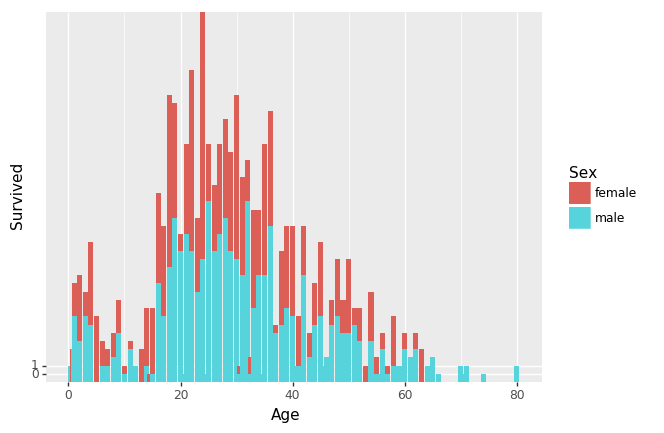

<ggplot: (289532136)>

In [144]:
# ggplot cheat sheet : https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
# 탑승지에 따라 살아남은 사람 

(ggplot(train)
 + aes(x='Age', y='Survived', fill = 'Sex')
 + geom_col()  #col로 그려보기 
)

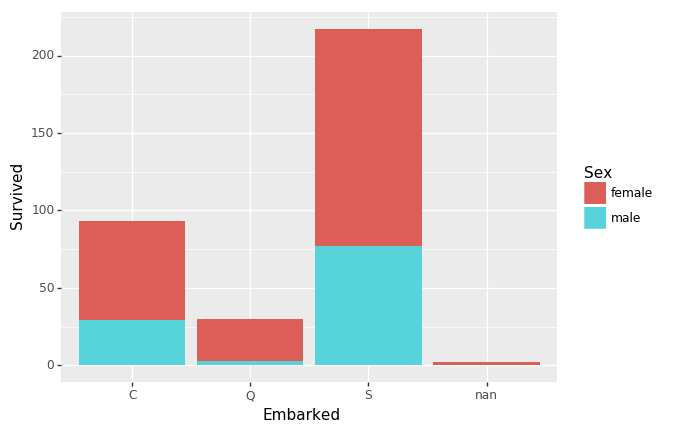

<ggplot: (-9223372036564518982)>

In [70]:
# ggplot cheat sheet : https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
# 탑승지에 따라 살아남은 사람 

(ggplot(train)
 + aes(x='Embarked', y='Survived', fill = 'Sex')
 + geom_col()  #col로 그려보기 
)

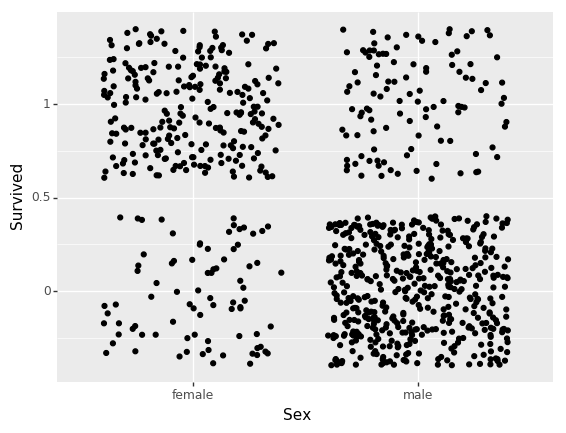

<ggplot: (-9223372036564660592)>

In [71]:
# ggplot cheat sheet : https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

(ggplot(train)
 + aes(x='Sex', y='Survived')
 + geom_jitter()  #col로 그려보기 
)

In [84]:
# 박스플롯을 그리기 위해 pclass를 카테고리컬하게 그려본다. 

train['Pclass'] = train['Pclass'].astype('category')

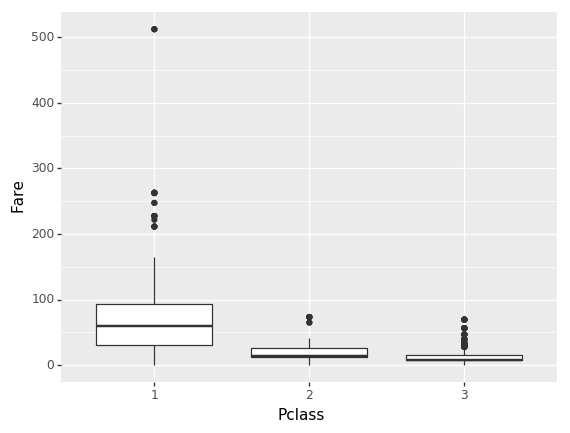

<ggplot: (-9223372036564129585)>

In [85]:
# ggplot cheat sheet : https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

(ggplot(train)
 + aes(x='Pclass', y='Fare')
 + geom_boxplot()
)

/Users/jieun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/jieun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/jieun/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


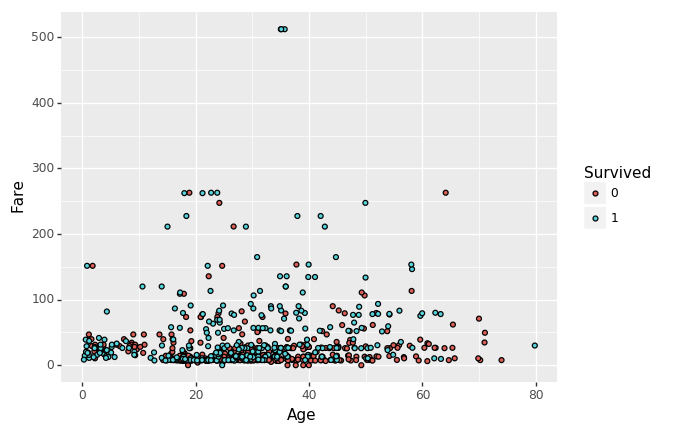

<ggplot: (291034958)>

In [104]:
# ggplot cheat sheet : https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

train['Survived'] = train['Survived'].astype('category')

(ggplot(train)
 + aes(x='Age', y='Fare', fill='Survived')
 + geom_jitter()
)

## 타이타닉 데이터 실습하기

In [169]:
# 우선 Survived column 이 없어서 만들어준다. 
# 사실 0 으로 초기화 해줄 필요는 없긴 하다.

test['Survived'] = 0

In [170]:
test.shape

(418, 12)

In [215]:
# 우선 여자이거나 9살 이하이면 살린다.

test['Survived'] = (( test['Sex'] == 'female') & (test['Pclass'] < 3)) \
                    | (test['Embarked'] != 'S') \
                    | (test['Age'] <= 9)

In [225]:
test['Survived'].value_counts()

False    210
True     208
Name: Survived, dtype: int64

In [217]:
test.head(25)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,False
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,True
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,False
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,True
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,False


In [218]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [219]:
# 에러 안나게 하려면 copy 필수!

submission = test[['PassengerId','Survived']].copy()

In [220]:
submission.head()

,PassengerId,Survived
0,892,True
1,893,False
2,894,True
3,895,False
4,896,False


In [227]:
# survived 타입을 0과 1 로 변경해준다 (int타입)

submission['Survived'] = submission['Survived'].astype(int)

In [228]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0


In [229]:
submission.to_csv('submissions/submission_female_9.csv', index=False)

In [230]:
s = pd.read_csv('submissions/submission_female_9.csv')
s

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 제출 결과는 72 %